<a href="https://colab.research.google.com/github/XaviSaenz/PracticasAI/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 2:
Utilizando una base de datos de interes propio, realizar los pasos necesarios para completar un algoritmo de k medias.

https://www.kaggle.com/search?q=clustering+in%3Adatasets

Paso 2: Investigar el concepto de las siguentes herramientas:

Agrupamiento jerarquico

DBSCAN

Escriban el concepto y tipo de datos que se ajustan a ambos algoritmos, en sus propias palabras.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

alcohol_data = pd.read_csv('/content/drive/MyDrive/Maestria/Inteligencia Artificial/Datasets/wine-clustering.csv')
#alcohol_data.head()

In [ ]:
# Pasamos los datos a variables de caracteristicas y objetivo
alcohol_features = alcohol_data[['Alcohol', 'Malic_Acid']]

target = alcohol_data['Color_Intensity']

In [ ]:
# Normalizamos los datos de caracteristicas
centroide = StandardScaler()
centroid_features = centroide.fit_transform(alcohol_features)

In [ ]:
# Aplicamos PCA a los datos
pca = PCA(n_components=2)
reduced_alcohol_features = pca.fit_transform(alcohol_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centroids (in PCA-reduced space):
        PC1       PC2
0  1.488447 -0.173149
1 -0.631102  0.073415


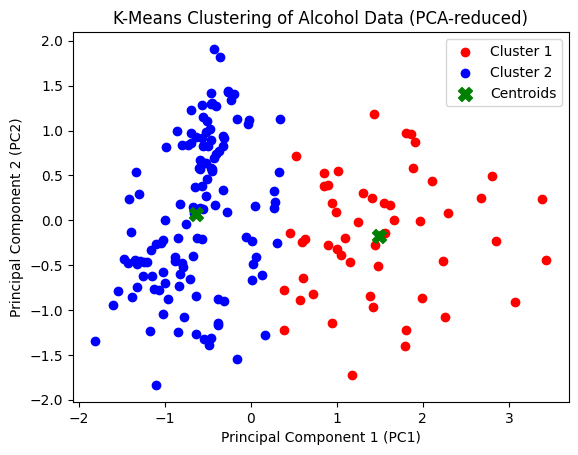

In [ ]:
# Aplicamos k medias
K = 2
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(reduced_alcohol_features)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
alcohol_data['Cluster'] = labels

print("Cluster Centroids (in PCA-reduced space):")
print(pd.DataFrame(centroids, columns=['PC1', 'PC2']))

plt.scatter(reduced_alcohol_features[alcohol_data['Cluster'] == 0, 0], reduced_alcohol_features[alcohol_data['Cluster'] == 0, 1], color='red', label='Cluster 1')
plt.scatter(reduced_alcohol_features[alcohol_data['Cluster'] == 1, 0], reduced_alcohol_features[alcohol_data['Cluster'] == 1, 1], color='blue', label='Cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], color='green', marker='X', s=100, label='Centroids')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.title('K-Means Clustering of Alcohol Data (PCA-reduced)')
plt.show()

# Agrupamiento jerarquico

Es una herramienta para poder agrupar varias caracteristicas de una muestra y definir que tan lejos estan cada una de ellas (dependiendo que tantas caracterisiticas comparten entre si). Que tantas similitudes hay despues del agrupamiento de estas caracteristicas.


*   La distancia entre cada una de este conjunto de caracteristicas se denomina Cluster. Al igual que hay diferentes medidas de distancias.
*   Tambien estan las medidas de similitudes (enlaces simples, completa o promedio) para definir como se van a agrupar los clusters de acuerdo a estas.

Se crean Dendogramas:


1.   Medir distancias (aplicar metodo de distancia) entre cada una de las caracteristicas
2.   Agrupar las que tienen menor distancia (aplicar medio de similitud)
3.   Repetir hasta que todas las caracteristicas conformen un cluster


[Imagen de un Dendograma](https://drive.google.com/file/d/1ijakJ8D1O60c7MJSPRb7tXRozfFaRC8D/view?usp=sharing)

#DBSCAN

Es una herramienta para identificar clusters que estan anidados en dimensiones grandes (> 4). Utiliza la **densidad** (que tan cerca esta un elemento de otro, pero este parametro se define por el usuario) de las caracteristicas de los datos para agrupar los clusters. Al igual que al procesarse el algoritmo los clusters pueden ir creciendo y creciendo ("son incrementales")

Si una caracteristica no esta cerca de algun elemento (dependiendo que tanta distancia es la que se define), no se forma un cluster; se les conoce como outliners.

En si estos serian los pasos a seguir:


1.   Se definen los core points (aquel elemento que esta tan cerca a **n** numero de elementos). *Esto tambien se define por el usuario.*
2.   Se escoge de manera aleatoria uno de los core points, y se define a este como el primer cluster.
3.   Se asignan los demas core points que estan cerca del core point escogido (de manera aleatoria, *en el paso 2*) al cluster que se formo (*paso 2*). Y este paso se repite con los demas core points que estan cerca al primer cluster modificado (porque se agregaron numeros core points)
4.   Si se llegan a topar varios core points y no core points (outliner), se ignora el no core point y solo se asignan los core points
5.   Cuando ya no hay core points por agregar, ahora se agregan los no core points que estan cerca del cluster creado. Pero como se agrega un no core point, el cluster ya no buscara mas core points o no core points para seguir creciendo. ****Los no core points se pueden agregar a un cluster, pero no pueden hacer que este se siga extendiendo despues de agruparse***

6. Se repiten los pasos con los demas core points que no se pudieron agregar al cluster (porque no estaban cerca del cluster final)


En la imagen de abajo el cluster azul y amarillo serian los cluster y los puntos morados serian los outliners

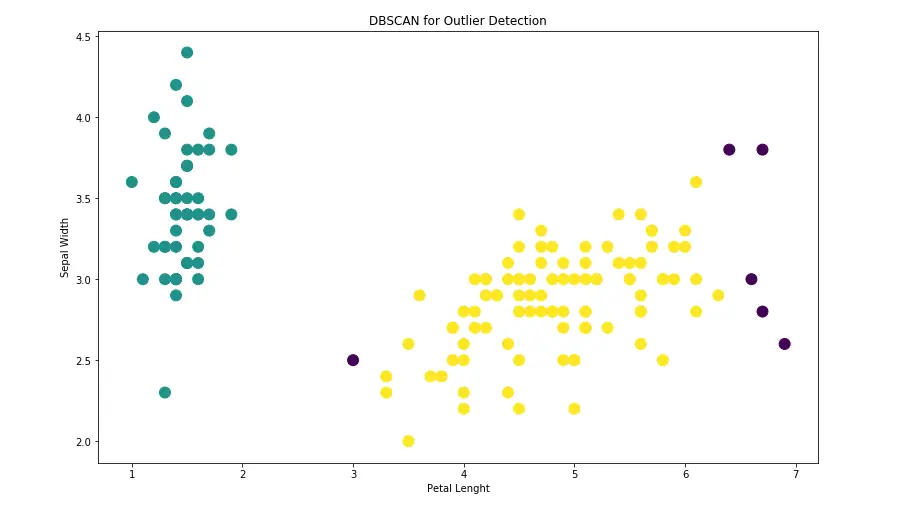








